In [ ]:
#df.to_csv('df.csv', index=False)

In [1212]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1213]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [1214]:
file = pd.read_csv(r"C:\Users\Lenovo\Desktop\Data_Scientist_Assigment-main\Input Data\orders_raw_input.csv",encoding = 'utf-8-sig')

In [1215]:
file1 = pd.read_csv(r"C:\Users\Lenovo\Desktop\Data_Scientist_Assigment-main\Input Data\returns_raw_input.csv",encoding = 'utf-8-sig')

In [1216]:
#Creating dataframe
file["orders"] = file["orders"].apply(lambda x : dict(eval(x)) )
orders = file["orders"].apply(pd.Series)

In [1217]:
file1["returns"] = file1["returns"].apply(lambda x : dict(eval(x)) )
returns = file1["returns"].apply(pd.Series)

In [1218]:
#Dropping missing values variables which have missing values greater than 40%
dict_miss={}

for i in orders:
    percent=(orders[i].isna().sum()/max_missing)*100
    dict_miss[i]=percent  
lst=[]
for i in dict_miss:
    if dict_miss[i]>=40.00:
        lst.append(i)
for j in orders:
    if j in lst:
        orders=orders.drop(j,axis=1)

In [1219]:
dict_miss1={}

for i in returns:
    percent=(returns[i].isna().sum()/max_missing)*100
    dict_miss[i]=percent  
lst1=[]
for k in dict_miss:
    if dict_miss[k]>=40.00:
        lst.append(k)
for j in returns:
    if j in lst:
        returns=returns.drop(j,axis=1)

#### Extracting Variants for Orders table as join should be on Variant_id and Order_id


In [1220]:
variants=[]
for i in orders["line_items"]:
    variants.append(i[0]["variant_id"])
orders['variants'] = variants


In [1221]:
#Extracting province
province=[]
for i in orders['shipping_address']:
    province.append(i["province"])

orders['province']=province

In [1222]:
orders['variants']=orders['variants'].apply(lambda x: str(x))

In [1223]:
# set([str(v) for v in variants]) & set(v1)

In [1224]:
orders = orders.rename(columns={'id': 'ordid'})

In [1225]:
orders['ordid'] = orders['ordid'].astype(str)

In [1226]:
# product_counts = merged_df["name_y"].value_counts()
# product_counts

In [1227]:
# product_counts1 = merged_df["variant_name"].value_counts()
# product_counts1

In [1228]:
# orders['variants'] = orders['ordid'].astype(str)

In [1233]:
common_cols = set(orders.columns).intersection(set(returns.columns))
print(list(common_cols))

['name', 'variants', 'ordid', 'order_number']


#### Merging both Dataframes

In [1236]:
merged_df = pd.merge(orders, returns, on =['ordid','variants'],how='left')

In [1237]:
merged_df.shape

(108, 138)

In [1321]:
#Creating Target Variable if order returned then 1 else 0
Target=[]
for i in merged_df['received_status']:
    if i==True:
        Target.append(1)
    else:
        Target.append(0)
        
merged_df['Target']=Target        

In [1238]:
# merged_df.to_csv('ordid.csv', index=False)

In [1239]:
# percent=(merged_df['browser_ip'].isna().sum()/max_missing)*100
# print(percent)

In [1240]:
# merged_df['request_type'].fillna('Order completed', inplace=True)

In [1241]:
# a=merged_df.groupby('request_type')['ordid'].count().reset_index()


In [1242]:
import datetime as dt

In [1243]:
#Changing dataframe of order's process time
merged_df['processed_at']=merged_df['processed_at'].apply(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S%z'))

In [1244]:
type(merged_df['processed_at'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [1245]:
merged_df['processed_year'] = merged_df['processed_at'].dt.year
merged_df['processed_month'] = merged_df['processed_at'].dt.month
merged_df['processed_day'] = merged_df['processed_at'].dt.day

In [1246]:
merged_df['processed_hour'] = merged_df['processed_at'].dt.hour

In [1247]:
#Creating column that shows if orderes are processed during Morning , Afternoon or evening
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [1248]:
merged_df['processed_hour']=merged_df['processed_hour'].apply(time_type)

<AxesSubplot:title={'center':'Time_type'}, xlabel='processed_hour', ylabel='count'>

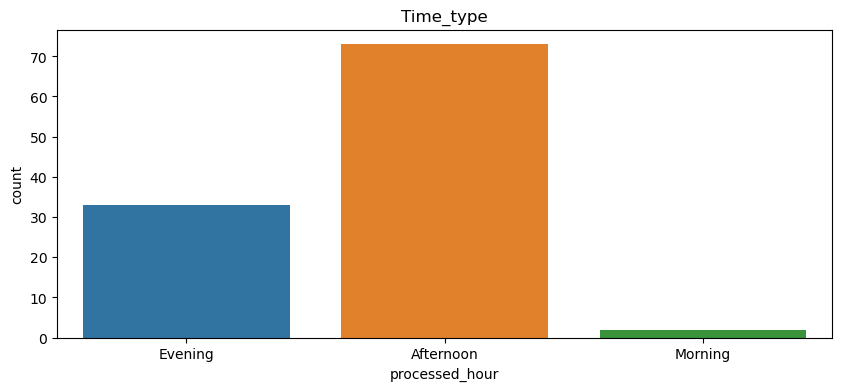

In [1249]:
plt.figure(figsize=(10,4))
plt.title('Time_type')
sns.countplot(x='processed_hour',data=merged_df)

#### Very Few returns are requested in the morning, while the majority are requested in the afternoon. , it can be customers are doing shopping in their break time or there might be an offer on going for orders on Afternoon Hours

In [1300]:
#Updating the month names to something more clearer
month_map = {6: 'June', 7: 'July', 8: 'August', 9:'September', 10: 'October', 11: 'November', 12: 'December'}
merged_df['processed_month'] = merged_df['processed_month'].replace(month_map)

In [1252]:
#Adding a column that indicates if a return of an order was successful
order_successfully_returned=[]
for i in merged_df["received_status"]:
    if i==True:
        order_successfully_returned.append(i)
    else :
        order_successfully_returned.append(np.nan)
merged_df['order_successfully_returned']=order_successfully_returned     

In [1253]:
# Adding a column that indicates if a return of an order was not successful
order_successfully_not_returned=[]
for i in merged_df["received_status"]:
    if i==False:
        order_successfully_not_returned.append(i)
    else :
        order_successfully_not_returned.append(np.nan)
merged_df['order_successfully_not_returned']=order_successfully_not_returned

In [1342]:
count=0
for i in merged_df["received_status"]:
    if i==True:
        count+=1
count

25

In [1350]:
len(merged_df['ordid'])

108

### Return Rate :You can calculate the return rate by dividing the number of returned items by the total number of items sold. This can help you identify how many items you are losing to returns and whether there are any patterns in returns over time or by product

In [1367]:
return_rate=count/108
round((return_rate*100),2)

23.15

In [1303]:
#Obtaining data on the various request types that resulted in successful returns for each month
request_status_month=merged_df.groupby(['processed_month','request_type'])['order_successfully_returned'].count().reset_index()

In [1257]:
import plotly.express as px

In [1302]:
fig = px.histogram(request_status_month, x="processed_month", y="order_successfully_returned",
             color='request_type', barmode='group',
             height=500,width=1000,title='Return status for each month')
fig.show()

#### June is the month with the most returns received, and November has the fewest. The months in which no order was returned were maybe October and September. Additionally, June was the month with the most exchanges. These insights may have been obtained as a result of some low-quality products that were returned or exchanged.

In [1259]:
city_return=merged_df.groupby(['customer_city'])['order_successfully_returned'].count().reset_index()


,customer_city,order_successfully_returned
0,Birdsboro,6
1,Dallas,0
2,Hillsville,10
3,Staten Island,8
4,Temecula,1
5,morristown,0


<AxesSubplot:xlabel='customer_city', ylabel='order_successfully_returned'>

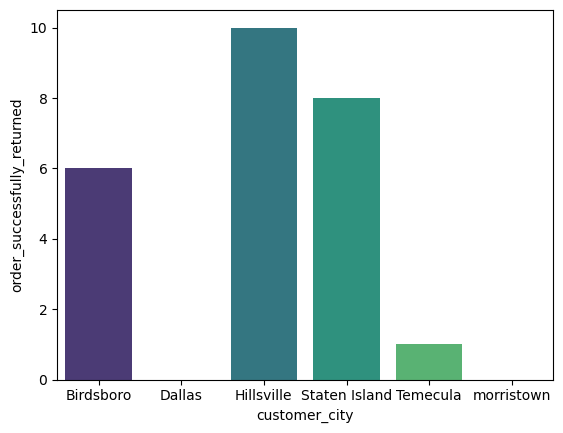

In [1260]:
sns.barplot(data=city_return,x='customer_city',y='order_successfully_returned', palette='viridis')

#### Out of total return requested products Hillsville city have highest count of successful returns followed by Staten Island

In [1261]:
city_not_return=merged_df.groupby(['customer_city','variants'])['order_successfully_not_returned'].count().reset_index()


,customer_city,variants,order_successfully_not_returned
0,Birdsboro,42194191483033,0
1,Birdsboro,42194224906393,2
2,Birdsboro,42194729599129,0
3,Birdsboro,42194729828505,0
4,Dallas,42194742444185,1
5,Hillsville,42194224906393,0
6,Hillsville,42194729402521,1
7,Hillsville,42194729631897,3
8,Hillsville,42194742411417,2
9,Hillsville,42194742444185,0


<BarContainer object of 19 artists>

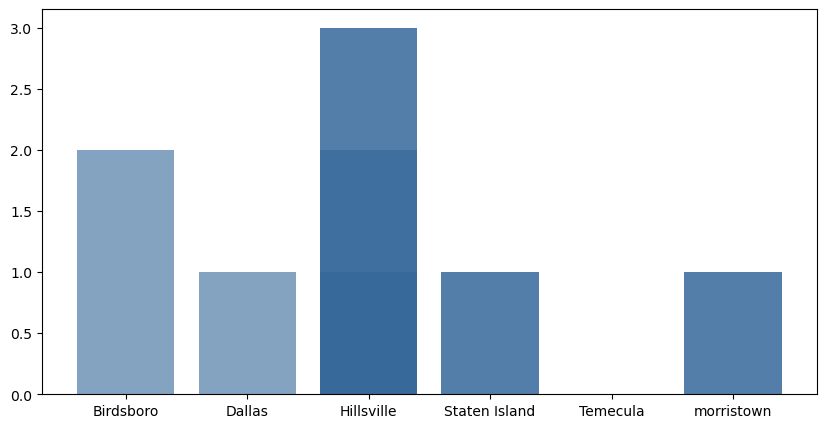

In [1262]:
x = list(city_not_return['customer_city'])
y = list(city_not_return['order_successfully_not_returned'])
fig = plt.figure(figsize = (10, 5))
plt.bar(x, y, color=(0.2, 0.4, 0.6, 0.6))

#### Hillsville city has the greatest percentage of returns that were unsuccessfully returned out of all the products that were returned, followed by Birdsboro. Potential explanations include the fact that Hillville has the maximum number of orders, which justifies the high number of unsuccessful returns in this city.

In [1263]:
merged_df['customer_name'] = merged_df['customer_name'].replace('Santhosh  KR', 'Santhosh KR')

In [1305]:
returned_status_customer=merged_df.groupby(['customer_name','variants'])['received_status'].count().reset_index()

Text(0.5, 1.0, 'Customer vs Received status')

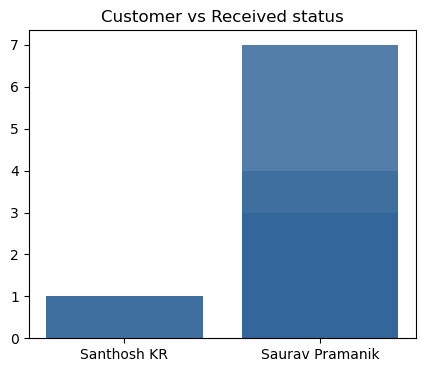

In [1307]:
x = list(returned_status_customer['customer_name'])
y = list(returned_status_customer['received_status'])
fig = plt.figure(figsize = (5, 4))
plt.bar(x, y, color=(0.2, 0.4, 0.6, 0.6))
plt.title('Customer vs Received status')

In [1266]:
successfully_return_customer=merged_df.groupby(['customer_name','variants'])['order_successfully_returned'].count().reset_index()

Text(0.5, 1.0, 'Customer with successfull returns')

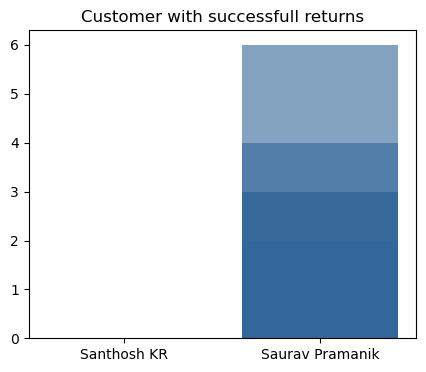

In [1333]:
x = list(successfully_return_customer['customer_name'])
y = list(successfully_return_customer['order_successfully_returned'])
fig = plt.figure(figsize = (5, 4))
plt.bar(x, y, color=(0.2, 0.4, 0.6, 0.6))
plt.title('Customer with successfull returns')

#### Saurav has the highest count for the returns requested and their product reached return destination successfully

Text(0.5, 1.0, 'Customer with unsuccesfull returns')

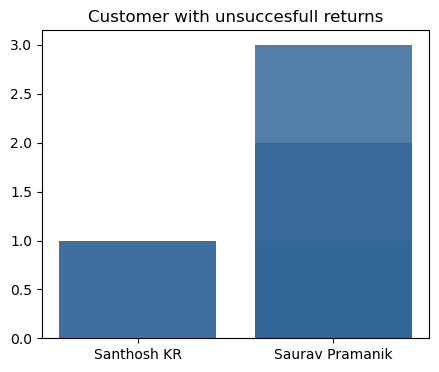

In [1309]:
successfully_not_return_customer=merged_df.groupby(['customer_name','variants'])['order_successfully_not_returned'].count().reset_index()
x = list(successfully_not_return_customer['customer_name'])
y = list(successfully_not_return_customer['order_successfully_not_returned'])
fig = plt.figure(figsize = (5, 4))
plt.bar(x, y, color=(0.2, 0.4, 0.6, 0.6))
plt.title('Customer with unsuccesfull returns')

#### Here also saurav has the highest count for the returns requested but the products did not reached return destination successfully . It can be due to either product misplaced or it was not updated or its in process

In [1310]:
# Group the DataFrame by month and request type, and count the number of IDs
counts = request_status_month.groupby(['processed_month', 'request_type']).count()

# Calculate the return rate for each month
return_rates = counts.groupby(level=0).apply(lambda x: 100*x / float(x.sum()))

return_rates = return_rates.loc[(slice(None), 'Return'), :]

return_rates = return_rates.reset_index().rename(columns={'id': 'return_rate'})



In [1311]:
fig1 = px.pie(return_rates, values='order_successfully_returned', names='processed_month', title=' Return rate of Orders per month')
fig1.show()

Text(0.5, 1.0, 'Orders from different sources')

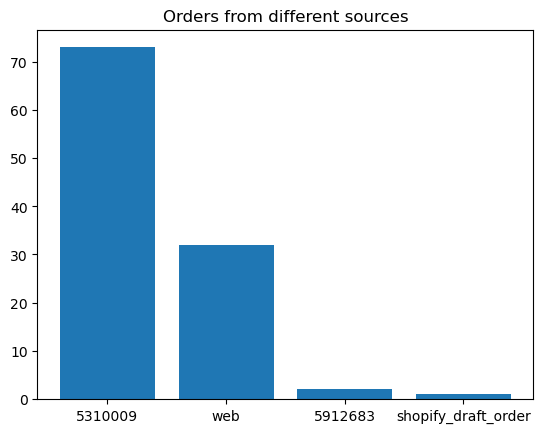

In [1313]:
#Orders from different sources
source=merged_df['source_name'].value_counts().reset_index()
source = source.reset_index().rename(columns={'index': 'source_id'})
plt.bar(source['source_id'], source['source_name'])
plt.title('Orders from different sources')

In [1273]:
#Count of products which was returned most
fig=px.bar(counts_df,x='count', y='name_y',title='Count of returned products',height=800)
fig.show()

#### Women Quilted Handleheld Red and Pink are the most returned product and we can focus on these two products to decrease the return rate

In [1314]:
request_status_month_product=merged_df.groupby(['processed_month','name_y'])['order_successfully_returned'].count().reset_index()

In [1319]:
fig = px.histogram(request_status_month_product, x="processed_month", y="order_successfully_returned",
             color='name_y', barmode='group',
             height=500,width=1000,title='Category vs Mean Size')
fig.show()

#### Women Quilted Handheld is the highest returned product and it is returned most in June that justifies why June has the highest count of returned order 

In [1274]:
df_with_tax = merged_df[merged_df['total_tax'] > str(1)][['ordid', 'total_tax','province']]
df_with_tax

,ordid,total_tax,province
13,4519241351321,17.94,California
18,4518969180313,3.59,California


#### Tax was applied only on two orders and both orders are from california. It can be due to shipping address related to overseas addresses

In [1275]:
a=merged_df[['ordid', 'status', 'crea_date','upda_date']]
a=a.dropna()

In [1285]:
type(a['upda_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [1295]:
a = a.reset_index(drop=True)

In [1284]:
#converting upda_date into datetime datatype
a['upda_date']= a['upda_date'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%dT%H:%M:%S.%fZ'))

In [1286]:
#Time difference between a product return updated time and created time
a['tot_mins_diff'] = round((a.upda_date - a.crea_date) / pd.Timedelta(minutes=1),2)

In [1287]:
#Time difference between a product return updated time and created time in days
a['time_diff_in_update'] =a.upda_date - a.crea_date

In [1291]:
a['product_name']=merged_df['name_y']

In [1292]:
#Filling missing values with Name_not_available
a['product_name']=a['product_name'].fillna('Name_not_available')

In [1325]:
a.head(10)

,ordid,status,crea_date,upda_date,tot_mins_diff,time_diff_in_update,product_name
0,4500713603225,OPEN,2022-06-03 08:59:32.032354,2022-06-03 09:11:33.464682,12.02,0 days 00:12:01.432328,Women Quilted Handheld Bag - Red
1,4508540993689,OPEN,2022-06-08 15:30:39.207309,2022-06-08 16:28:41.568533,58.04,0 days 00:58:02.361224,Name_not_available
2,4508540993689,OPEN,2022-06-13 07:28:01.163579,2022-06-13 07:28:01.163604,0.00,0 days 00:00:00.000025,Name_not_available
3,4508540993689,OPEN,2022-06-13 07:28:15.395017,2022-06-13 07:28:15.395040,0.00,0 days 00:00:00.000023,Uni-Colored Women T-shirt - White / Medium / F...
4,4508212887705,OPEN,2022-06-08 14:41:02.873058,2023-02-01 06:16:47.067951,342215.74,237 days 15:35:44.194893,Uni-Colored Women T-shirt - White / Medium / F...
5,4516704911513,OPEN,2022-06-15 07:01:41.217545,2022-06-15 07:03:06.007348,1.41,0 days 00:01:24.789803,Uni-Colored Women T-shirt - White / Medium / F...
6,4516662182041,OPEN,2022-06-13 09:41:00.137742,2022-06-13 09:45:49.822772,4.83,0 days 00:04:49.685030,Name_not_available
7,4519052869785,OPEN,2022-06-15 09:02:51.715426,2022-06-15 09:07:11.704880,4.33,0 days 00:04:19.989454,Name_not_available
8,4525583106201,OPEN,2022-06-20 16:28:21.521190,2022-06-20 16:28:42.236100,0.35,0 days 00:00:20.714910,Women Quilted Handheld Bag - Pink
9,4527072477337,FAILED,2022-08-22 15:18:52.672801,2022-08-29 11:35:58.955269,9857.10,6 days 20:17:06.282468,Name_not_available


* crea_date : Return created
* upda_date : Updated time
* tot_mins_diff : It shows how much minutes it take to update a order after receiving the order,we can use this to reduce gap between cretated time and updated time. 
* time_diff_in_update : days taken for update, some of the orders took around 200+ days for update . We have to look for these values to keep updated inventory

In [1290]:
#Median time to solve update different Status
time_taken_to_update_status=a.groupby('status')['time_diff_in_update'].median().reset_index()
time_taken_to_update_status

,status,time_diff_in_update
0,FAILED,6 days 20:17:06.282468
1,OPEN,0 days 00:10:06.039469500
2,REJECTED,0 days 00:03:51.412345
3,Received,121 days 19:43:03.280015


In [1293]:
# timediff_products=a.groupby(['product_name','status']).agg({'time_diff_in_update':'mean'}).sort_values('time_diff_in_update',ascending=False)
timediff_product=a[['product_name','status','tot_mins_diff']]

In [1324]:
#Difference between to update the status after returning
fig = px.scatter(timediff_product, x="status", y="product_name", size='tot_mins_diff', width=1000, height=700)
fig.show()

#### Status of returned product either it's status is OPEN , Marked as Received or it got failed , also each order's update status

In [1331]:
#Dropping unnecessary columns
merged_df=merged_df.drop(['admin_graphql_api_id','current_total_discounts','current_total_tax','note','note_attributes','order_status_url','tax_lines','token','fulfillments','refunds','exchange_message','selected_product_for_exchange','original_image','selected_variant_image','label_url','error','info_note','reverse_shipment_fee','reverse_shipment_flat_fee','refund_adjust_amount_val','reverse_shipment_fee_paid','ran','tax_collected','payout_link','customer_upi_id'],axis=1)

In [1332]:
# merged_df.to_csv('merged_df.csv', index=False)